In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

In [2]:
#UDF 
def fn_descriptives( x ):
    
    n_tot = x.isnull().count()
    n_miss = x.isnull().sum()
    n_miss_perc = n_miss / n_tot
    
    p25 = x.quantile(0.25)
    p75 = x.quantile(0.75)
    
    iqr = p75 - p25
    
    lc_iqr = p25 - 1.5 * iqr
    uc_iqr = p75 + 1.5 * iqr
    
    return pd.Series( [ x.dtype, x.nunique(), n_tot, x.count(), n_miss, n_miss_perc, 
                       x.sum(), x.var(), x.std(), x.mean(), 
                       iqr, lc_iqr, uc_iqr, 
                       x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), 
                       x.quantile(0.25), x.quantile(0.50), x.quantile(0.75), 
                       x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max()],
                     
                    index = ['dtype', 'cardinality', 'n_tot', 'n', 'n_miss', 'n_miss_perc',
                             'sum', 'var', 'std', 'mean',
                             'iqr', 'lc_iqr', 'uc_iqr',
                             'min', 'p1', 'p5', 'p10', 
                             'p25', 'p50', 'p75', 
                             'p90', 'p95', 'p99', 'max'])

## BUSINESS PROBLEM-1

In [5]:
loan_data = pd.read_csv(r"C:\Users\hp\Downloads\Basic Statistics - Hypothesis Testing\LoansData.csv")
loan_data.head(2)

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years


## DATA PREP

In [6]:
loan_data.shape

(2500, 14)

In [7]:
loan_data.columns

Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State',
       'Home.Ownership', 'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length'],
      dtype='object')

In [8]:
#Assigning the correct column names of the data
loan_data.rename( {'Amount.Requested': 'amt_req', 'Amount.Funded.By.Investors': 'amt_funded_by_investors', 'Interest.Rate': 'interest_rate',
       'Loan.Length': 'loan_length_Month', 'Loan.Purpose': 'loan_purpose', 'Debt.To.Income.Ratio': 'debt_to_inc_ratio',
       'Home.Ownership': 'home_ownership', 'Monthly.Income':'monthly_inc', 'FICO.Range':'FICO_Range', 'Open.CREDIT.Lines':'open_REDIT_lines',
       'Revolving.CREDIT.Balance': 'revolving_CREDIT_Bal' , 'Inquiries.in.the.Last.6.Months':'last_6month_inquiries',
       'Employment.Length':'employment_Length'}, axis= 1 , inplace= True)

In [9]:
loan_data.columns

Index(['amt_req', 'amt_funded_by_investors', 'interest_rate',
       'loan_length_Month', 'loan_purpose', 'debt_to_inc_ratio', 'State',
       'home_ownership', 'monthly_inc', 'FICO_Range', 'open_REDIT_lines',
       'revolving_CREDIT_Bal', 'last_6month_inquiries', 'employment_Length'],
      dtype='object')

In [10]:
# removing % symbol from the data
loan_data.interest_rate = loan_data.interest_rate.str.replace("%", '').astype('float')
loan_data.debt_to_inc_ratio = loan_data.debt_to_inc_ratio.str.replace("%", '').astype('float')
# loan length col
loan_data.loan_length_Month = loan_data.loan_length_Month.str.replace("months", '').astype('float')

In [11]:
# null value treatment
loan_data.isnull().sum()

amt_req                     1
amt_funded_by_investors     1
interest_rate               2
loan_length_Month           0
loan_purpose                0
debt_to_inc_ratio           1
State                       0
home_ownership              1
monthly_inc                 1
FICO_Range                  2
open_REDIT_lines            3
revolving_CREDIT_Bal        3
last_6month_inquiries       3
employment_Length          77
dtype: int64

In [12]:
loan_data.drop( columns='employment_Length' , inplace= True)
loan_data.dropna( inplace= True)

In [13]:
loan_data.shape

(2489, 13)

In [14]:
# seperate categorical and continuous variables
loan_data_conti_vars = loan_data.loc[:, (loan_data.dtypes == 'float64') | (loan_data.dtypes == 'int64')]
loan_data_cat_vars = loan_data.loc[:, (loan_data.dtypes == 'object')]

In [15]:
loan_data_conti_vars.apply(fn_descriptives)

,amt_req,amt_funded_by_investors,interest_rate,loan_length_Month,debt_to_inc_ratio,monthly_inc,open_REDIT_lines,revolving_CREDIT_Bal,last_6month_inquiries
dtype,float64,float64,float64,float64,float64,float64,float64,float64,float64
cardinality,378,707,273,2,1664,630,29,2342,10
n_tot,2489,2489,2489,2489,2489,2489,2489,2489,2489
n,2489,2489,2489,2489,2489,2489,2489,2489,2489
n_miss,0,0,0,0,0,0,0,0,0
n_miss_perc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sum,30888300.0,29879833.09,32533.5,102756.0,38286.26,14150580.53,25075.0,37883581.0,2254.0
var,60945301.903335,60039786.026045,17.450548,98.935762,56.357326,15727546.230929,20.3333,334804674.667375,1.517208
std,7806.747204,7748.534444,4.177385,9.946646,7.507152,3965.797049,4.509246,18297.668558,1.23175
mean,12409.923664,12004.754154,13.070912,41.28405,15.382186,5685.2473,10.074327,15220.40217,0.905585


In [16]:
# outlier treatment
for var in loan_data_conti_vars.columns:
        loan_data[var] = np.where(loan_data[var] > loan_data[var].quantile(0.99) ,
                                    loan_data[var].quantile(0.99), loan_data[var])

In [6]:
claims = pd.read_csv(r"C:\Users\hp\Downloads\Python Foundation Case Study 3 - Insurance Claims Case Study\claims.csv")
claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [7]:
cust = pd.read_csv(r"C:\Users\hp\Downloads\Python Foundation Case Study 3 - Insurance Claims Case Study\cust_demographics.csv")
cust

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [8]:
Cust_claims= claims.merge(cust, left_on=['customer_id'], right_on=['CUST_ID'], how='inner')
Cust_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1085 non-null   int64  
 1   customer_id          1085 non-null   int64  
 2   incident_cause       1085 non-null   object 
 3   claim_date           1085 non-null   object 
 4   claim_area           1085 non-null   object 
 5   police_report        1085 non-null   object 
 6   claim_type           1085 non-null   object 
 7   claim_amount         1020 non-null   object 
 8   total_policy_claims  1075 non-null   float64
 9   fraudulent           1085 non-null   object 
 10  CUST_ID              1085 non-null   int64  
 11  gender               1085 non-null   object 
 12  DateOfBirth          1085 non-null   object 
 13  State                1085 non-null   object 
 14  Contact              1085 non-null   object 
 15  Segment              1085 non-null   o

### Q2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.

In [9]:
Cust_claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


In [10]:
numeric_columns = Cust_claims.select_dtypes(include = ['float64', 'int64'])
object_columns = Cust_claims.select_dtypes(include = ['object'])

In [11]:
def continuous_var_summary( x ):
    
    # freq and missings
    n_total = x.shape[0]
    n_miss = x.isna().sum()
    perc_miss = n_miss * 100 / n_total
    
    # outliers - iqr
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr
    
    return pd.Series( [ x.dtype, x.nunique(), n_total, x.count(), n_miss, perc_miss,
                       x.sum(), x.mean(), x.std(), x.var(), 
                       lc_iqr, uc_iqr, 
                       x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), 
                       x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), 
                       x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max() ], 
                     
                    index = ['dtype', 'cardinality', 'n_tot', 'n', 'nmiss', 'perc_miss',
                             'sum', 'mean', 'std', 'var',
                        'lc_iqr', 'uc_iqr',
                        'min', 'p1', 'p5', 'p10', 'p25', 'p50', 'p75', 'p90', 'p95', 'p99', 'max']) 

In [12]:
def categorical_var_summary( x ):
    
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100 / x.count(), 2)], 
                     
                  index = ['n', 'nmiss', 'MODE', 'FREQ', 'PERCENT'])

In [13]:
numeric_audit=numeric_columns.apply( lambda x: continuous_var_summary(x))
numeric_audit

,claim_id,customer_id,total_policy_claims,CUST_ID
dtype,int64,int64,float64,int64
cardinality,1085,1078,8,1078
n_tot,1085,1085,1085,1085
n,1085,1085,1075,1085
nmiss,0,0,10,0
perc_miss,0.0,0.0,0.921659,0.0
sum,53073348315,55083176211,1706.0,55083176211
mean,48915528.400922,50767904.341935,1.586977,50767904.341935
std,29128181.617819,28496245.372373,1.146859,28496245.372373
var,848450964360648.625,812036000322492.625,1.315286,812036000322492.625


In [14]:
# there are id variables and total_policy_claims only which can be processed as per the given data, it requires data type conversions to proper format

In [15]:
categorical_audit= object_columns.apply( lambda x: categorical_var_summary(x))
categorical_audit

,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,fraudulent,gender,DateOfBirth,State,Contact,Segment
n,1085,1085,1085,1085,1085,1020,1085,1085,1085,1085,1085,1085
nmiss,0,0,0,0,0,65,0,0,0,0,0,0
MODE,Other causes,04/04/2018,Auto,No,Material only,$2320,No,Male,18-Oct-72,NY,743-569-4783,Gold
FREQ,285,18,970,621,653,7,838,556,2,31,2,375
PERCENT,26.27,1.66,89.4,57.24,60.18,0.69,77.24,51.24,0.18,2.86,0.18,34.56


In [16]:
# the amount variables, date variables shall be changed to proper formats, contact variable has no business significance for the analysis.

# ###### Data type conversions for variables which are not of proper type

# claim_date, claim_amount($, datatype), DateOfBirth

In [26]:
Cust_claims["DateOfBirth"] = pd.to_datetime(Cust_claims.DateOfBirth, format = "%d-%b-%y")
Cust_claims.loc[(Cust_claims.DateOfBirth.dt.year > 2020),"DateOfBirth"]=Cust_claims[Cust_claims.DateOfBirth.dt.year > 2020]["DateOfBirth"].apply(lambda x: x - pd.DateOffset(years=100))


In [27]:
Cust_claims["claim_date"] = pd.to_datetime(Cust_claims.claim_date, format = "%m/%d/%Y")

## Q3 Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign

In [28]:
Cust_claims["claim_amount"]= Cust_claims['claim_amount'].astype(str)
Cust_claims['claim_amount'] = Cust_claims['claim_amount'].str.replace('$','')
Cust_claims['claim_amount']= np.where(Cust_claims.claim_amount== "nan","",Cust_claims.claim_amount )

C:\Users\hp\AppData\Local\Temp\ipykernel_25100\1006674452.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Cust_claims['claim_amount'] = Cust_claims['claim_amount'].str.replace('$','')


In [29]:
Cust_claims['claim_amount'] = pd.to_numeric(Cust_claims['claim_amount'])
np.dtype(Cust_claims.claim_amount)

dtype('float64')

## Q4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims

In [30]:
Cust_claims['unreported_claims']= np.where(Cust_claims.police_report== 'Unknown',1,0)
Cust_claims.head(10)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,unreported_claims
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,1
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,0
5,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,1
6,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold,0
7,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold,0
8,24050443,21831191,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes,21831191,Male,1977-05-17,NH,419-712-8513,Gold,0
9,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1.0,No,21831191,Male,1977-05-17,NH,419-712-8513,Gold,1


## Q5. One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

In [31]:
Cust_claims= Cust_claims.drop_duplicates(subset="customer_id", keep= "last")

## Q6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)


In [32]:
Cust_claims.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
unreported_claims       0
dtype: int64

In [33]:
Cust_claims["claim_amount"]= Cust_claims['claim_amount'].replace(np.NaN,Cust_claims['claim_amount'].mean())
Cust_claims["claim_amount"].isna().sum()

0

In [34]:
Cust_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1078 entries, 0 to 1084
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1078 non-null   int64         
 1   customer_id          1078 non-null   int64         
 2   incident_cause       1078 non-null   object        
 3   claim_date           1078 non-null   datetime64[ns]
 4   claim_area           1078 non-null   object        
 5   police_report        1078 non-null   object        
 6   claim_type           1078 non-null   object        
 7   claim_amount         1078 non-null   float64       
 8   total_policy_claims  1068 non-null   float64       
 9   fraudulent           1078 non-null   object        
 10  CUST_ID              1078 non-null   int64         
 11  gender               1078 non-null   object        
 12  DateOfBirth          1078 non-null   datetime64[ns]
 13  State                1078 non-nul

In [35]:
Cust_claims["total_policy_claims"] = Cust_claims['total_policy_claims'].fillna(Cust_claims['total_policy_claims'].mode()[0])

In [36]:
Cust_claims["total_policy_claims"]= Cust_claims["total_policy_claims"].astype(str)

In [37]:
Cust_claims["total_policy_claims"].isna().sum()

0

## Q7. Calculate the age of customers in years. Based on the age, categorize the
customers according to the below criteria
Children < 18
Youth 18-30
Adult 30-60
Senior > 60


In [38]:
curr_year = pd.to_datetime('today').year
dob_year = pd.DatetimeIndex(Cust_claims['DateOfBirth']).year          #extract year from DateOfBirth
x = dob_year-100                                               # for the years which belongs to 60's
v = curr_year - x
y = curr_year - dob_year
Cust_claims['age'] = (np.where(dob_year > curr_year,v,y))
#Categorising
Cust_claims.loc[(Cust_claims.age < 18),'AgeGroup'] = 'Children'
Cust_claims.loc[(Cust_claims.age >=18) & (Cust_claims.age <30),'AgeGroup'] = 'Youth'
Cust_claims.loc[(Cust_claims.age >=30) & (Cust_claims.age <60),'AgeGroup'] = 'Adult'
Cust_claims.loc[(Cust_claims.age >=60),'AgeGroup'] = 'Senior'

In [39]:
Cust_claims.head(10)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,unreported_claims,age,AgeGroup
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0,44,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,1,53,Adult
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0,39,Adult
5,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,1,37,Adult
7,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold,0,46,Adult
9,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1.0,No,21831191,Male,1977-05-17,NH,419-712-8513,Gold,1,46,Adult
10,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,18401412,Male,1999-03-02,AR,752-398-2914,Gold,0,24,Youth
11,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3.0,No,73486606,Male,1999-10-25,AK,256-968-9172,Silver,0,24,Youth
12,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.0,1.0,No,32813689,Male,1993-10-12,ID,142-324-7481,Silver,1,30,Adult
13,63246959,33507197,Crime,2017-07-22,Auto,No,Material only,2748.5,2.0,Yes,33507197,Female,1966-09-09,RI,165-519-4583,Gold,0,57,Adult


In [40]:
Cust_claims.groupby(["AgeGroup"])["age"].count()

AgeGroup
Adult     802
Senior    102
Youth     174
Name: age, dtype: int64

## Q8. What is the average amount claimed by the customers from various segments?

In [41]:
Avg_amount_segment= round(Cust_claims.groupby(["Segment"])["claim_amount"].mean(),2)
Avg_amount_segment

Segment
Gold        12846.39
Platinum    12371.64
Silver      12267.15
Name: claim_amount, dtype: float64

## Q9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [42]:
Amount_incedent= round(Cust_claims.loc[Cust_claims.claim_date < "2018-09-10",:].groupby("incident_cause")["claim_amount"].sum().add_prefix("total_"),2)
Amount_incedent

incident_cause
total_Crime                  721937.45
total_Driver error          3315847.88
total_Natural causes        1312744.91
total_Other causes          3723147.30
total_Other driver error    3277533.37
Name: claim_amount, dtype: float64

## Q10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [43]:
Cust_claims.columns

Index(['claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact',
       'Segment', 'unreported_claims', 'age', 'AgeGroup'],
      dtype='object')

In [44]:
Adults_claims_count= Cust_claims.loc[(Cust_claims.incident_cause.str.lower().str.contains("driver") & (Cust_claims.State== "TX") | (Cust_claims.State== "DE") | (Cust_claims.State== "AK")) ].groupby(["State"])["claim_amount"].count()
Adults_claims_count

State
AK    19
DE    29
TX    10
Name: claim_amount, dtype: int64

## Q11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [45]:
Claim_gender_segment= round(Cust_claims.groupby(["Segment", "gender"])["claim_amount"].sum().reset_index(),2)
Claim_gender_segment

,Segment,gender,claim_amount
0,Gold,Female,2110042.41
1,Gold,Male,2655966.87
2,Platinum,Female,2369720.43
3,Platinum,Male,2096443.42
4,Silver,Female,1897301.87
5,Silver,Male,2347130.84


In [46]:
Claim_gender_segment_pivot= Claim_gender_segment.pivot(index="Segment", columns= "gender", values= "claim_amount")
Claim_gender_segment_pivot

gender,Female,Male
Segment,,
Gold,2110042.41,2655966.87
Platinum,2369720.43,2096443.42
Silver,1897301.87,2347130.84


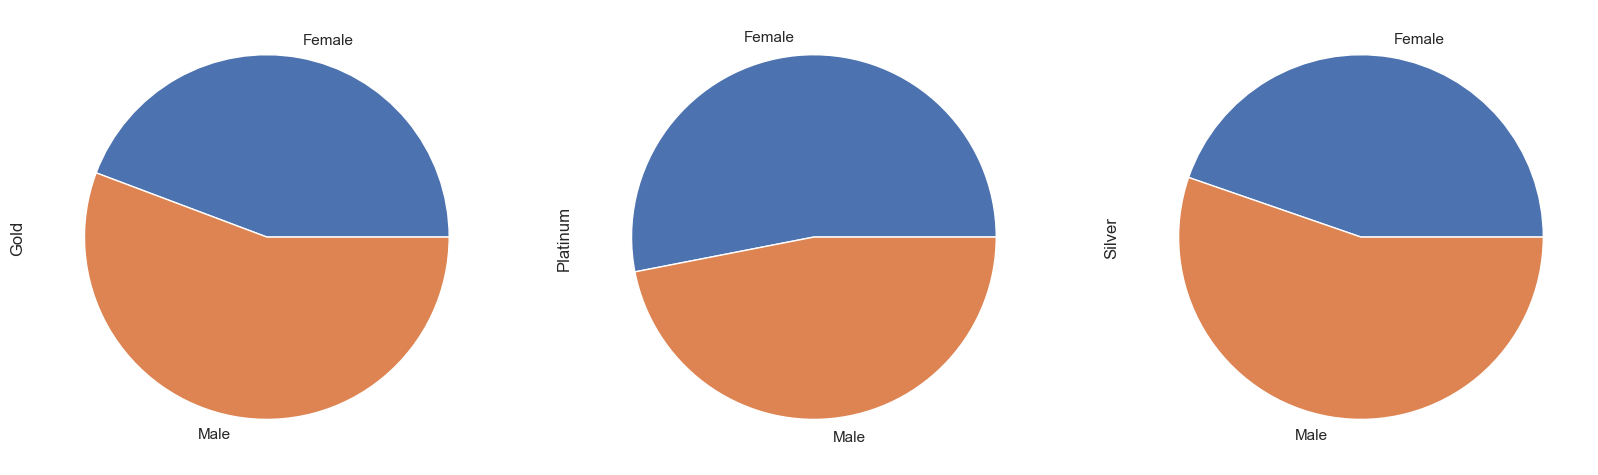

In [47]:
Claim_gender_segment_pivot.T.plot(kind="pie", subplots= True, legend= False,figsize=(20,10))
plt.show()

## Q12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart


In [48]:
Claim_gender_driver= Cust_claims.loc[(Cust_claims.incident_cause.str.lower().str.contains("driver"))].groupby(["gender"])[["gender"]].count().add_prefix("countOf_").reset_index()
Claim_gender_driver

,gender,countOf_gender
0,Female,221
1,Male,281


[]

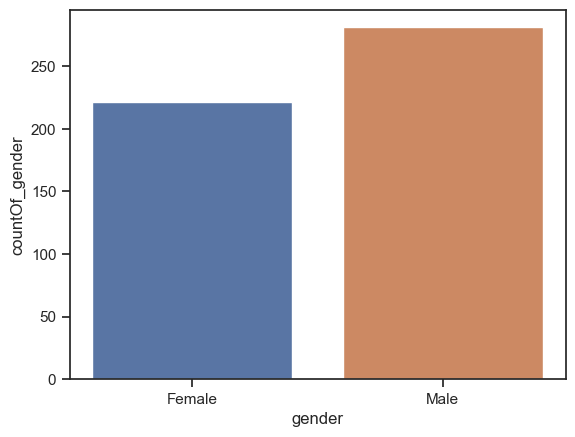

In [49]:
sns.barplot(x= "gender", y= "countOf_gender", data= Claim_gender_driver)
plt.plot()

## Q13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar char

In [50]:
Cust_claims["Frauds"]= np.where(Cust_claims.fraudulent == "Yes",1,0)

In [51]:
AgeGroup_max_frauds= Cust_claims.groupby(["AgeGroup"])["Frauds"].sum().reset_index()
AgeGroup_max_frauds

,AgeGroup,Frauds
0,Adult,188
1,Senior,26
2,Youth,31


[]

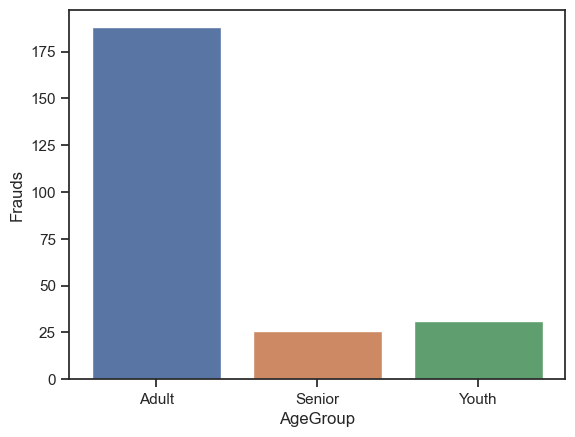

In [52]:
sns.barplot(x= "AgeGroup", y="Frauds", data=AgeGroup_max_frauds )
plt.plot()

## Q14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order. 

In [53]:
Cust_claims['claim_month'] = pd.to_datetime(Cust_claims['claim_date'])
Cust_claims['Claim_month'] = Cust_claims['claim_month'].dt.month

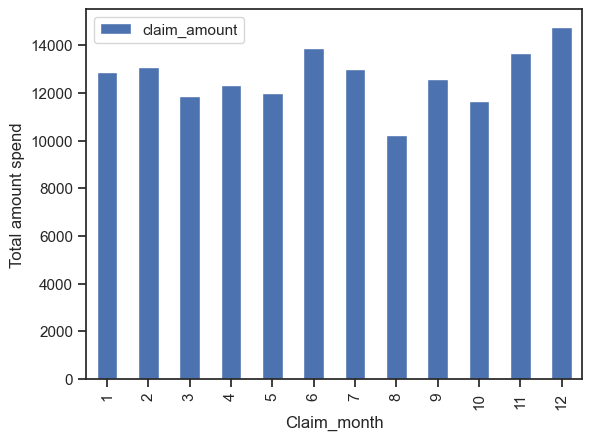

In [54]:
pd.pivot_table(Cust_claims,index="Claim_month",values="claim_amount").plot(kind='bar')
plt.ylabel('Total amount spend')
plt.show()

## Q15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [55]:
Frauds_amount_gender= pd.DataFrame(Cust_claims.loc[(Cust_claims.fraudulent=="Yes")].groupby(["gender","AgeGroup"])[["claim_amount"]].mean().add_prefix("Fraud_"))
Non_Frauds_amount_gender=pd.DataFrame(Cust_claims.loc[(Cust_claims.fraudulent=="No")].groupby(["gender","AgeGroup"])[["claim_amount"]].mean().add_prefix("Non_Fraud_"))

In [56]:
Claims_age_gender=round(pd.merge(Frauds_amount_gender,Non_Frauds_amount_gender, on=["gender","AgeGroup"]),2)
Claims_age_gender

Fraud_claim_amount  Non_Fraud_claim_amount
gender AgeGroup                                            
Female Adult               12751.46                12126.99
       Senior               3332.29                13350.57
       Youth               10144.56                13149.62
Male   Adult               15362.62                12307.32
       Senior              19463.11                10871.00
       Youth                8937.87                13277.99

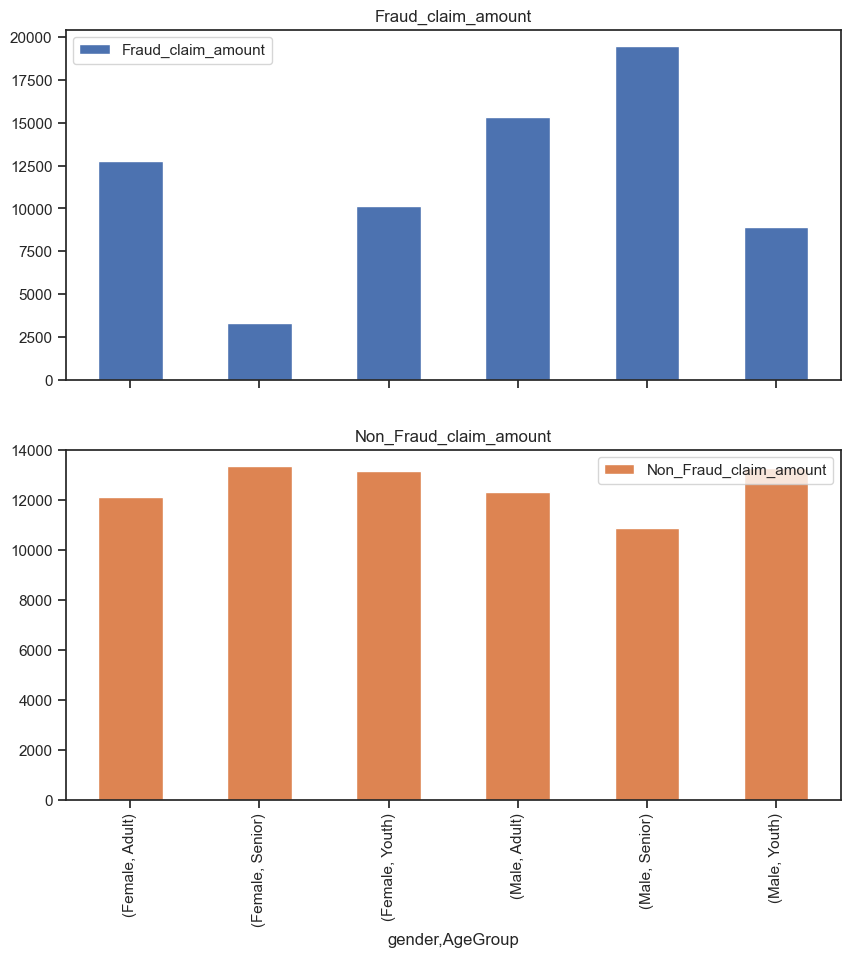

In [57]:
Claims_age_gender.plot(kind="bar", subplots= True, legend= True,figsize=(10,10))
plt.show()

## Q16. Is there any similarity in the amount claimed by males and females?

In [58]:
claim_male = Cust_claims['claim_amount'].loc[Cust_claims['gender']=="Male"]
claim_female = Cust_claims['claim_amount'].loc[Cust_claims['gender']=="Female"]

In [59]:
print("The average amount claimed by males is {}".format(claim_male.mean()))

print("The average amount claimed by females is {}".format(claim_female.mean()))

The average amount claimed by males is 12884.829631308425
The average amount claimed by females is 12100.692029236623


In [60]:
import scipy.stats as stats
#checking the variance

eq_var = stats.ttest_ind(a= claim_male,
                b= claim_female,
                equal_var=True)    # equal variance
eq_var.statistic

0.9630529881732579

In [61]:
uneq_var = stats.ttest_ind(a= claim_male,
                b= claim_female,
                equal_var=False)    # UnEqual variance
uneq_var.statistic

0.9637241707490979

In [62]:
t= eq_var.statistic
p= eq_var.pvalue

print(" For the above test, the t-score is {} and the p-value is {}".format(t,p))

if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

 For the above test, the t-score is 0.9630529881732579 and the p-value is 0.3357373087404283
We fail to reject null hypothesis


In [64]:
# As the significance value of t test is greater than 0.05 we can safely conclude that there is a similarity in amount claimed by males and females.

## Q17. Is there any relationship between age category and segment?


In [65]:
agecat_seg = pd.crosstab(Cust_claims.AgeGroup, Cust_claims.Segment, margins = True)
agecat_seg

Segment,Gold,Platinum,Silver,All
AgeGroup,,,,
Adult,277,268,257,802
Senior,38,34,30,102
Youth,56,59,59,174
All,371,361,346,1078


In [66]:
Chi_test = stats.chi2_contingency(observed= agecat_seg)
Chi_test

(0.9130129732295924,
 0.9996131825739819,
 9,
 array([[ 276.01298701,  268.57328386,  257.41372913,  802.        ],
        [  35.1038961 ,   34.15769944,   32.73840445,  102.        ],
        [  59.88311688,   58.2690167 ,   55.84786642,  174.        ],
        [ 371.        ,  361.        ,  346.        , 1078.        ]]))

In [67]:
print("The chi square stat is {} and the p value is {}".format(Chi_test[0],Chi_test[1]))

The chi square stat is 0.9130129732295924 and the p value is 0.9996131825739819


In [68]:
# Since the significance value of the test is greter than 0.05, we fail reject the null hypothesis. Therefore there is no relationship between age category and segment

## Q18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [69]:
Cust_claims["Year"]= Cust_claims['claim_month'].dt.year

In [70]:
#current year as per the data given in 2018

In [83]:
Current_year= Cust_claims.loc[Cust_claims.Year == 2018]["claim_amount"]
amt_2016_17= Cust_claims.loc[Cust_claims.Year==2017]["claim_amount"]

In [ ]:
stats.pearsonr(Current_year,amt_2016_17)

## Q19. Is there any difference between age groups and insurance claims?

In [85]:
# Here we will perform Ftest ANOVA

In [86]:
age_group_1 = Cust_claims['total_policy_claims'].loc[Cust_claims['AgeGroup']=="Youth"]
age_group_2 = Cust_claims['total_policy_claims'].loc[Cust_claims['AgeGroup']=="Adult"]
# Perfrom the Anova
anova = stats.f_oneway(age_group_1,age_group_2)
# Statistic :  F Value
f = anova.statistic
p = anova.pvalue
print("The f-value is {} and the p value is {}".format(f,p))
if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

The f-value is 0.8243054715998778 and the p value is 0.3641489228997691
We fail to reject null hypothesis


In [88]:
# Since the significance value of the test is greater than 0.05, we fail reject the null hypothesis. Therefore, there is no difference between age groups and insurance claims or No influence of age groups on insurance claims

## Q 20. Is there any relationship between total number of policy claims and the claimed amount?


In [89]:
Cust_claims['total_policy_claims'] = pd.to_numeric(Cust_claims['total_policy_claims'])
#Correlation
Cust_claims.total_policy_claims.corr(other= Cust_claims.claim_amount)

-0.022392720732099917

In [90]:
# As the correlation is negative the number of policy claims in inversely propotional to the claimed amount.